<a href="https://colab.research.google.com/github/sarthak3248/Task1_Grip_Foundation_Data_Science/blob/main/SPARKS_TASK1_Supervised_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Model to Predict the Marks of a given student based on the Study Hours

In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix

Importing the Required Dataset

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

Viewing the First Five Rows of the Dataset

In [ ]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


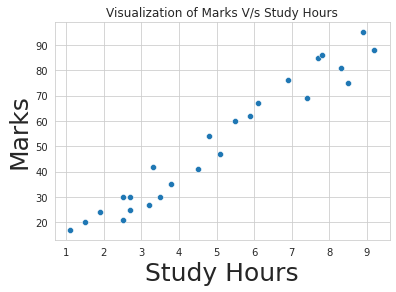

In [ ]:
#Visualization of Marks Vs Study Hrs
sns.set_style("whitegrid")
sns.scatterplot(y=data["Scores"], x=data["Hours"])
plt.title("Visualization of Marks V/s Study Hours")
plt.xlabel("Study Hours", size=25)
plt.ylabel("Marks", size=25)
plt.show()

Plotting Regression Line 

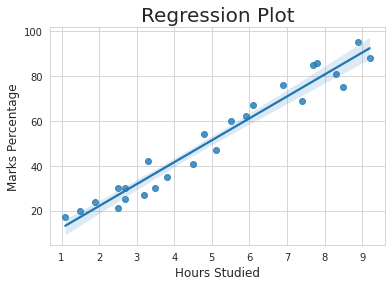

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [ ]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

Training the Model

In [ ]:
#Splitting Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

In [ ]:
#Fitting the Data into the Model
regression_model = LinearRegression()
regression_model.fit(train_X, train_y)
print("__MODEL_TRAINING__")

__MODEL_TRAINING__


Predicting the Percentage of Marks

In [ ]:
pred_y = regression_model.predict(test_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in test_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


Comparision Scores( Actual V/s Predicted )

In [ ]:
scores = pd.DataFrame({'Actual Marks': test_y, 'Predicted Marks': pred_y})
scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


Visualization of Actual V/s Predicted Marks

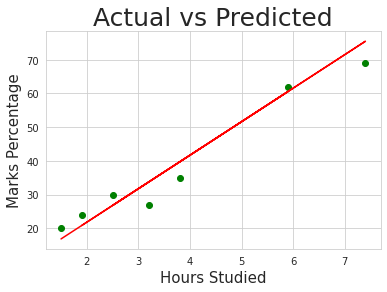

In [ ]:
plt.scatter(x=test_X, y=test_y, color='green')
plt.plot(test_X, pred_y, color='red')
plt.title('Actual vs Predicted', size=25)
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()

Model Evaluation

In [ ]:
print("Error in Prediction :" , mean_absolute_error(test_y, pred_y))

Error in Prediction : 4.130879918502482


Prediction of Score of a Student Studing 6 hrs/day using Our Model

In [ ]:
hrs = [9.7] # Number of Hrs Studied
ans = regression_model.predict([hrs]) #Predicting Score
print("Score : ", format(round(ans[0], 2)))  #Printing Score rounded off upto 2 decimal places 

Score :  98.37
